In [1]:
# Importing libraries.
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)
# Custom module.
class Net(nn.Module):

    # Contructor.
    def __init__(self, D_in, H, D_out):

        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H) # Hidden layer.
        self.linear2 = nn.Linear(H, D_out) # Output layer.

    # Predictor.
    def forward(self, x):

        # We can pass same variable name.
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))

        return x

In [3]:
# Creating a model with 2 hidden units.
model = Net(1, 2, 1)

In [4]:
# Single example.
x = torch.tensor([1.0])
yhat = model(x)
print(yhat)

tensor([0.4216], grad_fn=<SigmoidBackward>)


In [5]:
# Multiple examples.
x = torch.tensor([[1.0], [2.0], [3.0]])
yhat = model(x)
print(yhat)

tensor([[0.4216],
        [0.3915],
        [0.3664]], grad_fn=<SigmoidBackward>)


In [6]:
# Using nn.Sequential.
model_seq = nn.Sequential(nn.Linear(1, 2), nn.Sigmoid(), nn.Linear(2, 1), nn.Sigmoid())

yhat = model_seq(x)
print(yhat)

tensor([[0.4752],
        [0.4783],
        [0.4812]], grad_fn=<SigmoidBackward>)


In [7]:
# Training function.
def train(X, Y, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in  range(epochs):

        total = 0
        for x, y in zip(X, Y):

            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
        cost.append(total)
    
    return cost

In [8]:
# Creating data.
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [9]:
# Optimizer and cost function.
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# Ploting Classifier.
def PlotClassifier(X, Y, model, Train = False):
    if Train:
        l = 'After training'
    else:
        l = 'Before training'
    plt.plot(X.numpy(), model(X).detach().numpy(), label=l)
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    plt.legend()
    plt.show()

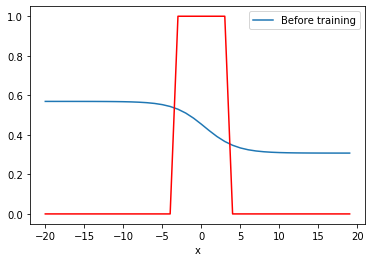

In [11]:
# Before training.
PlotClassifier(X, Y, model)

In [12]:
# Training.
cost_ = train(X, Y, model, optimizer, criterion, epochs=1000)

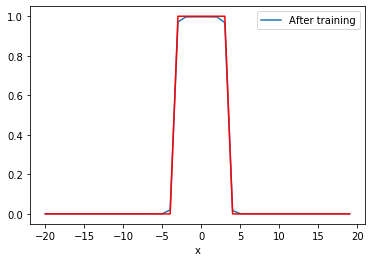

In [13]:
# After training.
PlotClassifier(X, Y, model, Train=True)

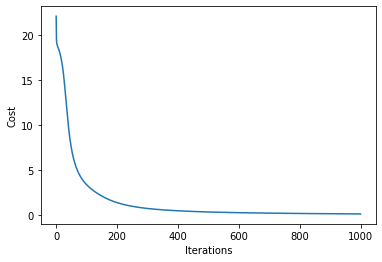

In [14]:
# Plotting Cost funtion.
plt.plot(cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()